REUTERS DATASET CLASSIFICATION WITH DEEP LEARNING

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.datasets import reuters

Loading Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(train_data)


8982

In [4]:
 len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Displaying Data

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[6]])

565248/550378 [==============================] - 0s 0us/step


In [7]:
decoded_newswire

'? lt qintex america ltd said it is again extending its offer of 13 dlrs a share for 3 3 mln princeville development corp shares until today from yesterday at midnight yesterday 7 242 117 princeville shares had been tendered up from 5 887 165 shares 24 hours earlier qintex said it is extending the offer to allow princeville to comply with federal law restricting the ownership of u s airlines by non u s citizens and to finalize the terms and conditions of the letter of credit or bank guarantee required under the previously announced acquisition agreement reuter 3'

In [8]:
 train_labels[6]

4

Vectorization Of Features And Labels

In [9]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Building And Compiling Initial Model

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


Making Training And Validation Sets

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Fitting Training And Validation Sets Into Model

In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 15s 82ms/step - loss: 3.1563 - accuracy: 0.3986 - val_loss: 1.7564 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 1s 39ms/step - loss: 1.5178 - accuracy: 0.7032 - val_loss: 1.3297 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 38ms/step - loss: 1.1251 - accuracy: 0.7599 - val_loss: 1.1471 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 1s 38ms/step - loss: 0.8866 - accuracy: 0.8120 - val_loss: 1.0467 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 0.6799 - accuracy: 0.8576 - val_loss: 0.9712 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 40ms/step - loss: 0.5540 - accuracy: 0.8858 - val_loss: 0.9229 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 38ms/step - loss: 0.4165 - accuracy: 0.9173 - val_loss: 0.8918 - val_accuracy: 0.8150
Epoch 8/20
1

Training And Validation Graphs

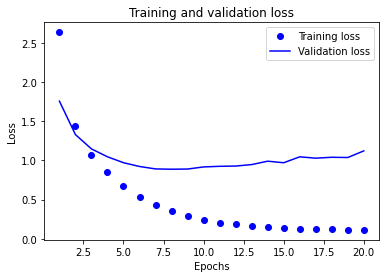

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

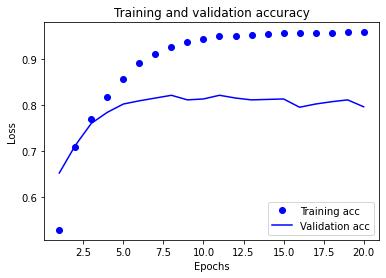

In [20]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Rebuilding The Model

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Fitting Train And Validation Sets Into New Model

In [27]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 56ms/step - loss: 3.0586 - accuracy: 0.4247 - val_loss: 1.7448 - val_accuracy: 0.6390
Epoch 2/9
16/16 [==============================] - 1s 37ms/step - loss: 1.5632 - accuracy: 0.6724 - val_loss: 1.3433 - val_accuracy: 0.7050
Epoch 3/9
16/16 [==============================] - 1s 37ms/step - loss: 1.1157 - accuracy: 0.7554 - val_loss: 1.1458 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 1s 37ms/step - loss: 0.8741 - accuracy: 0.8122 - val_loss: 1.0493 - val_accuracy: 0.7740
Epoch 5/9
16/16 [==============================] - 1s 37ms/step - loss: 0.6859 - accuracy: 0.8564 - val_loss: 0.9808 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 1s 36ms/step - loss: 0.5359 - accuracy: 0.8908 - val_loss: 0.9214 - val_accuracy: 0.8130
Epoch 7/9
16/16 [==============================] - 1s 38ms/step - loss: 0.4453 - accuracy: 0.9117 - val_loss: 0.9185 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

Evaluating Results

In [28]:
results = model.evaluate(x_test, one_hot_test_labels)
results

[0.9819073677062988, 0.7885128855705261]